# 1. 필요 라이브러리 불러오기

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. 데이터 불러오기

In [61]:
rental_2021 = pd.read_csv('G:/공유 드라이브/빅분기C조/ju_notes/data/#4. 공공자전거_대여이력_정보/rental_data_2021.csv', encoding='cp949')

In [62]:
rental_2021.head()

,Unnamed: 0,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
0,0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00
1,1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00
2,2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99
3,3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00
4,4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05


In [63]:
rental_2021.tail()

,Unnamed: 0,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
806498,806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00
806499,806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00
806500,806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37
806501,806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00
806502,806502,SPB-80617,2021-01-31 15:54:05,9999,상담센터,0,2021-01-31 16:11:01,117,홍은사거리,99,16,2310.00


In [64]:
# unnamed: 0 컬럼은 인덱스와 동일하므로 삭제
rental_2021.drop('Unnamed: 0', axis=1, inplace=True)

# 3. 데이터 요약 정보 확인

In [65]:
# 데이터프레임의 크기(행, 열)
rental_2021.shape

(806503, 11)

In [66]:
# 데이터프레임의 기본 정보
# null 값 없음
rental_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806503 entries, 0 to 806502
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bike_no          806503 non-null  object 
 1   rental_date      806503 non-null  object 
 2   rental_loc_no    806503 non-null  int64  
 3   rental_loc_name  806503 non-null  object 
 4   rental_rack      806503 non-null  int64  
 5   return_date      806503 non-null  object 
 6   return_loc_no    806503 non-null  int64  
 7   return_loc_name  806503 non-null  object 
 8   return_rack      806503 non-null  int64  
 9   rental_time      806503 non-null  int64  
 10  rental_distance  806503 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 67.7+ MB


In [67]:
rental_2021.isnull().sum()

bike_no            0
rental_date        0
rental_loc_no      0
rental_loc_name    0
rental_rack        0
return_date        0
return_loc_no      0
return_loc_name    0
return_rack        0
rental_time        0
rental_distance    0
dtype: int64

In [68]:
# 데이터프레임의 기술 정보 통계 요약
rental_2021.describe()

,rental_loc_no,rental_rack,return_loc_no,return_rack,rental_time,rental_distance
count,806503.000000,806503.000000,806503.000000,806503.000000,806503.00000,806503.000000
mean,1441.253196,1.450425,1432.446181,1.450131,25.69352,2783.126334
std,1014.718555,11.440007,1008.962894,11.437314,28.53219,3558.647413
min,3.000000,0.000000,3.000000,0.000000,1.00000,0.000000
25%,589.000000,0.000000,588.000000,0.000000,7.00000,759.320000
50%,1222.000000,0.000000,1215.000000,0.000000,15.00000,1596.080000
75%,2109.000000,0.000000,2105.000000,0.000000,34.00000,3355.420000
max,9999.000000,99.000000,9997.000000,99.000000,1589.00000,93737.660000


In [69]:
rental_2021[['rental_time', 'rental_distance']].describe()

,rental_time,rental_distance
count,806503.00000,806503.000000
mean,25.69352,2783.126334
std,28.53219,3558.647413
min,1.00000,0.000000
25%,7.00000,759.320000
50%,15.00000,1596.080000
75%,34.00000,3355.420000
max,1589.00000,93737.660000


In [70]:
# 데이터 unique값 확인
rental_2021.nunique()

bike_no             18945
rental_date        623499
rental_loc_no        2188
rental_loc_name      2186
rental_rack            42
return_date        623142
return_loc_no        2185
return_loc_name      2183
return_rack            42
rental_time           449
rental_distance    367241
dtype: int64

In [71]:
# 문자형 describe
rental_2021.describe(include=np.object)

,bike_no,rental_date,rental_loc_name,return_date,return_loc_name
count,806503,806503,806503,806503,806503
unique,18945,623499,2186,623142,2183
top,SPB-53496,2021-01-25 18:08:18,여의나루역 1번출구 앞,2021-01-25 18:51:08,뚝섬유원지역 1번출구 앞
freq,166,9,2592,8,3091


In [72]:
# 자동화 eda 패키지인 sweetviz를 통해 대략적인 eda 한눈에 확인
#import sweetviz as sv
#rental_report = sv.analyze(rental_2021)
#rental_report.show_html('rental_analyze.html')

# 4. 대여소별 대여/반납 현황

In [73]:
print('# 대여소 수')
print('대여 대여소: ', rental_2021['rental_loc_no'].nunique())
print('반납 대여소: ', rental_2021['return_loc_no'].nunique())

# 대여소 수
대여 대여소:  2188
반납 대여소:  2185


In [74]:
# 대여량이 많은 상위 대여소
rental_2021['rental_loc_name'].value_counts().head(10)

여의나루역 1번출구 앞         2592
뚝섬유원지역 1번출구 앞        2554
봉림교 교통섬              2345
롯데월드타워(잠실역2번출구 쪽)    2076
마곡나루역 2번 출구          2016
마포구민체육센터 앞           1905
구로디지털단지역 앞           1885
신대방역 2번 출구           1867
영등포구청역 1번출구          1772
마곡나루역 5번출구 뒤편        1756
Name: rental_loc_name, dtype: int64

In [75]:
# 반납량이 많은 상위 대여소
rental_2021['return_loc_name'].value_counts().head(10)

뚝섬유원지역 1번출구 앞        3091
여의나루역 1번출구 앞         2676
봉림교 교통섬              2405
마포구민체육센터 앞           2260
롯데월드타워(잠실역2번출구 쪽)    2084
마곡나루역 2번 출구          1989
구로디지털단지역 앞           1925
신대방역 2번 출구           1914
옥수역 3번출구             1854
발산역 1번, 9번 인근 대여소    1780
Name: return_loc_name, dtype: int64

1. 대여반납이 많은 상위 대여소인 여의나루역, 뚝섬유원지역, 봉림교, 롯데월드타워 전부 강이나 호수를 인근에 두고 있음

In [76]:
# 평균 이용거리 긴 상위 대여소
rental_2021.groupby(['rental_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=False).head(10)

,rental_loc_name,rental_distance
1185,석수역1번출구 앞 (SK주유소),8794.888931
31,IBK기업은행 석수역 지점 앞,8029.437273
1807,정곡나들목,7680.248418
563,독산보도육교 앞 자전거 보관소,7637.759959
1590,옥수역 3번출구,7216.878885
1419,신흥교(애견훈련소),7042.271875
743,망원초록길 입구,6966.740455
1914,창포원 남쪽 입구,6838.229216
2114,현대자동차서비스 앞,6646.442077
1946,청담나들목입구,6593.812088


In [77]:
# 평균 이동거리가 긴 석수역1번출구 앞 (SK주유소)에서 대여한 자전거의 반납 장소 확인
rental_2021.loc[rental_2021['rental_loc_name'] == '석수역1번출구 앞 (SK주유소)', 'return_loc_name']

551032            독산근린공원 입구
551033              앙카라공원 앞
551034          서부식자재마트 건너편
551035          서부식자재마트 건너편
551036                당산육갑문
                ...        
551186              초원아파트 앞
551187    석수역1번출구 앞 (SK주유소)
551188            빅마켓 금천점 앞
551189            빅마켓 금천점 앞
551190           서울디지털운동장 앞
Name: return_loc_name, Length: 159, dtype: object

In [78]:
# 평균 이용거리가 긴 상위 반납 대여소
rental_2021.groupby(['return_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=False).head(10)

,return_loc_name,rental_distance
1417,신흥교(애견훈련소),14169.624444
1183,석수역1번출구 앞 (SK주유소),8164.482596
1804,정곡나들목,8085.229245
1501,여의도 순복음교회,7653.034236
1946,청담역 2번출구,7598.155781
563,독산보도육교 앞 자전거 보관소,7439.984632
1943,청담나들목입구,7346.046907
1587,옥수역 3번출구,7078.888101
989,삼육대 제3과학관,7010.531667
1068,서빙고동 주민센터 앞,6961.858223


In [79]:
# 평균 이용거리가 짧은 대여소
rental_2021.groupby(['rental_loc_name'])['rental_distance'].mean().reset_index().sort_values(by='rental_distance', ascending=True).head()

,rental_loc_name,rental_distance
231,골마을 근린공원,0.000000
1679,위트콤,42.748874
1140,서울연신중학교,915.749894
706,마곡역 교차로(2번출구),1034.053663
1123,서울시립대 후문,1118.002275


In [80]:
# 평균 이용시간이 많은 상위 대여소
rental_2021.groupby(['rental_loc_name'])['rental_time'].mean().reset_index().sort_values(by='rental_time', ascending=False).head()

,rental_loc_name,rental_time
31,IBK기업은행 석수역 지점 앞,76.681818
1185,석수역1번출구 앞 (SK주유소),64.213836
465,능안마을입구,59.684211
1807,정곡나들목,56.841791
1361,신반포역 2번출구 앞,55.472050


In [81]:
# 평균 이용시간이 적은 상위 대여소
rental_2021.groupby(['rental_loc_name'])['rental_time'].mean().reset_index().sort_values(by='rental_time', ascending=True).head()

,rental_loc_name,rental_time
231,골마을 근린공원,8.000000
706,마곡역 교차로(2번출구),8.132632
1697,은평뉴타운 상림마을 13단지,9.750000
331,구파발역 환승센터,10.222222
691,마곡나루역 5번출구 뒤편,10.585421


# 5. 시계열 데이터 확인

In [82]:
rental_2021.head(1)

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.0


## 5.1 rental_date/return_date를 datetime 형으로 변환하고, 년/월/일/시간/오전오후/요일 분리
- 뺄건 빼면 되니까 일단 상세하게 시간 , 요일, 등등 분리해둠

In [83]:
rental_2021['rental_date'] = pd.to_datetime(rental_2021['rental_date'])
rental_2021['return_date'] = pd.to_datetime(rental_2021['return_date'])
rental_2021.dtypes

bike_no                    object
rental_date        datetime64[ns]
rental_loc_no               int64
rental_loc_name            object
rental_rack                 int64
return_date        datetime64[ns]
return_loc_no               int64
return_loc_name            object
return_rack                 int64
rental_time                 int64
rental_distance           float64
dtype: object

In [106]:
rental_2021['rental_YMD'] = rental_2021['rental_date'].dt.date
rental_2021['rental_year'] = rental_2021['rental_date'].dt.year
rental_2021['rental_month'] = rental_2021['rental_date'].dt.month
rental_2021['rental_day'] = rental_2021['rental_date'].dt.day
rental_2021['rental_hour'] = rental_2021['rental_date'].dt.hour
rental_2021['rental_minute'] = rental_2021['rental_date'].dt.minute
rental_2021['rental_dow'] = rental_2021['rental_date'].dt.dayofweek
rental_2021['rental_AM/PM'] = ['AM' if i < 12 else 'PM' for i in rental_2021['rental_hour']]

rental_2021['return_YMD'] = rental_2021['return_date'].dt.date
rental_2021['return_year'] = rental_2021['return_date'].dt.year
rental_2021['return_month'] = rental_2021['return_date'].dt.month
rental_2021['return_day'] = rental_2021['return_date'].dt.day
rental_2021['return_hour'] = rental_2021['return_date'].dt.hour
rental_2021['return_minute'] = rental_2021['return_date'].dt.minute
rental_2021['return_dow'] = rental_2021['return_date'].dt.dayofweek
rental_2021['return_AM/PM'] = ['AM' if i < 12 else 'PM' for i in rental_2021['return_hour']]

rental_2021 = rental_2021[['bike_no', 'rental_date','Rent_Hour', 
                           'Rent_AM/PM', 'Rent_dayofweek', 'rental_loc_no', 'rental_loc_name',
                           'rental_rack', 'return_date', 'Return_Hour', 
                           'Return_AM/PM', 'Return_dayofweek', 'return_loc_no', 'return_loc_name',
                           'return_rack', 'rental_time', 'rental_distance']]

In [85]:
rental_2021.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,rental_dayofweek,rental_AM/PM,return_YMD,return_year,return_month,return_day,return_hour,return_minute,return_dayofweek,return_AM/PM
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,...,5,PM,2021-01-02,2021,1,2,21,15,5,PM
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,...,0,PM,2021-01-04,2021,1,4,16,17,0,PM
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,...,2,PM,2021-01-13,2021,1,13,21,14,2,PM
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,...,3,PM,2021-01-14,2021,1,14,21,13,3,PM
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,...,0,PM,2021-01-18,2021,1,18,18,15,0,PM


## 5.2 월별 대여/반납 현황

In [87]:
rental_2021_month_1 = rental_2021['rental_month'].value_counts().reset_index()
rental_2021_month_1.columns = ['month', 'count']

rental_2021_month_1 = rental_2021_month_1.sort_values('month')
rental_2021_month_1['rent_return'] = '대여'
print(rental_2021_month_1.shape)

rental_2021_month_2 = rental_2021['return_month'].value_counts().reset_index()
rental_2021_month_2.columns = ['month', 'count']
rental_2021_month_2 = rental_2021_month_2.sort_values('month')
rental_2021_month_2['rent_return'] = '반납'
print(rental_2021_month_2.shape)

rental_2021_month = pd.concat([rental_2021_month_1, rental_2021_month_2])
print(rental_2021_month.shape)
rental_2021_month.head()

(1, 3)
(2, 3)
(3, 3)


,month,count,rent_return
0,1,806503,대여
0,1,806185,반납
1,2,318,반납


In [88]:
rental_2021_month_pivot =  rental_2021_month.pivot_table(index=['month'],
                                       columns=['rent_return'], 
                                       values='count', aggfunc=sum)
rental_2021_month_pivot

rent_return,대여,반납
month,,
1,806503.0,806185.0
2,NaN,318.0


<AxesSubplot:title={'center':'월별 자전거 대여수'}, xlabel='month'>

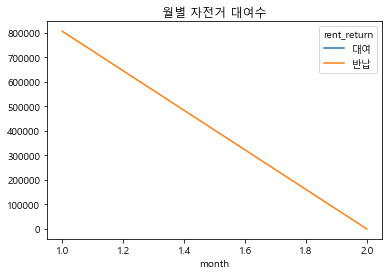

In [89]:
rental_2021_month_pivot.plot(title='월별 자전거 대여수', rot=0)

<AxesSubplot:title={'center':'월별 자전거 대여수'}, xlabel='month'>

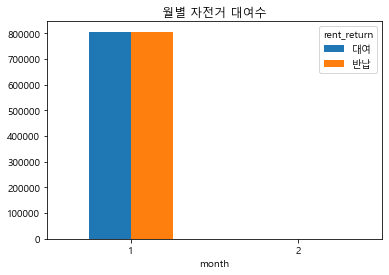

In [90]:
rental_2021_month_pivot.plot.bar(title='월별 자전거 대여수', rot=0)

<AxesSubplot:xlabel='month', ylabel='count'>

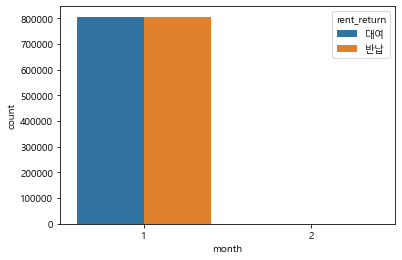

In [91]:
sns.barplot(data=rental_2021_month, x='month', y='count', hue='rent_return')

## 5.3 일자별 대여/반납 현황

In [92]:
rental_2021_day_1 = rental_2021['rental_day'].value_counts().reset_index()
rental_2021_day_1.columns = ['day', 'count']

rental_2021_day_1 = rental_2021_day_1.sort_values('day')
rental_2021_day_1['rent_return'] = '대여'
print(rental_2021_day_1.shape)

rental_2021_day_2 = rental_2021['return_day'].value_counts().reset_index()
rental_2021_day_2.columns = ['day', 'count']
rental_2021_day_2 = rental_2021_day_2.sort_values('day')
rental_2021_day_2['rent_return'] = '반납'
print(rental_2021_day_2.shape)

rental_2021_day = pd.concat([rental_2021_day_1, rental_2021_day_2])
print(rental_2021_day.shape)
rental_2021_day.head()

(31, 3)
(31, 3)
(62, 3)


,day,count,rent_return
18,1,22119,대여
15,2,23463,대여
20,3,21656,대여
7,4,32732,대여
10,5,28819,대여


In [93]:
rental_2021_day_pivot =  rental_2021_day.pivot_table(index=['day'],
                                       columns=['rent_return'], 
                                       values='count', aggfunc=sum)
rental_2021_day_pivot.head()

rent_return,대여,반납
day,,
1,22119,22223
2,23463,23492
3,21656,21692
4,32732,32711
5,28819,28854


<AxesSubplot:title={'center':'일별 자전거 대여수'}, xlabel='day'>

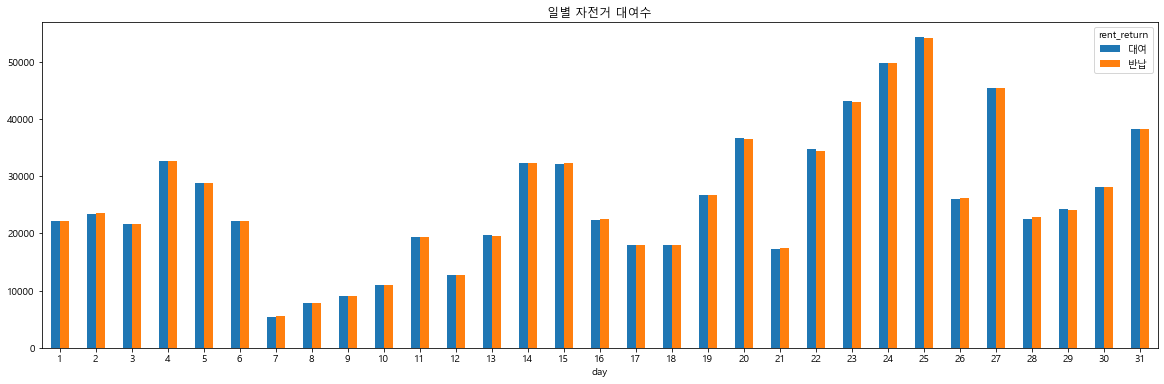

In [94]:
rental_2021_day_pivot.plot.bar(title='일별 자전거 대여수', rot=0, figsize=(20, 6))

<AxesSubplot:xlabel='day', ylabel='count'>

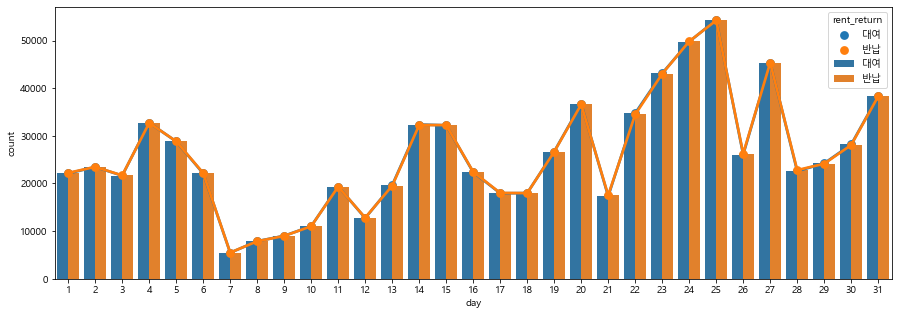

In [95]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=rental_2021_day, x='day', y='count', hue='rent_return')
sns.barplot(data=rental_2021_day, x='day', y='count', hue='rent_return')

In [98]:
rental_2021_ymd_1 = rental_2021['rental_YMD'].value_counts().reset_index()
rental_2021_ymd_1.columns = ['ymd', 'count']

rental_2021_ymd_1 = rental_2021_ymd_1.sort_values('ymd')
rental_2021_ymd_1['rent_return'] = '대여'
print(rental_2021_ymd_1.shape)

rental_2021_ymd_2 = rental_2021['return_YMD'].value_counts().reset_index()
rental_2021_ymd_2.columns = ['ymd', 'count']
rental_2021_ymd_2 = rental_2021_ymd_2.sort_values('ymd')
rental_2021_ymd_2['rent_return'] = '반납'
print(rental_2021_ymd_2.shape)

rental_2021_ymd = pd.concat([rental_2021_ymd_1, rental_2021_ymd_2])
print(rental_2021_ymd.shape)
rental_2021_ymd.head()

(31, 3)
(32, 3)
(63, 3)


,ymd,count,rent_return
18,2021-01-01,22119,대여
15,2021-01-02,23463,대여
20,2021-01-03,21656,대여
7,2021-01-04,32732,대여
10,2021-01-05,28819,대여


In [99]:
# 시간데이터로 표현하기 위해 타입을 바꿔준다.
rental_2021_ymd["ymd"] = pd.to_datetime(rental_2021_ymd["ymd"])
rental_2021_ymd["yymmdd"] = rental_2021_ymd["ymd"].dt.date

<AxesSubplot:xlabel='yymmdd', ylabel='count'>

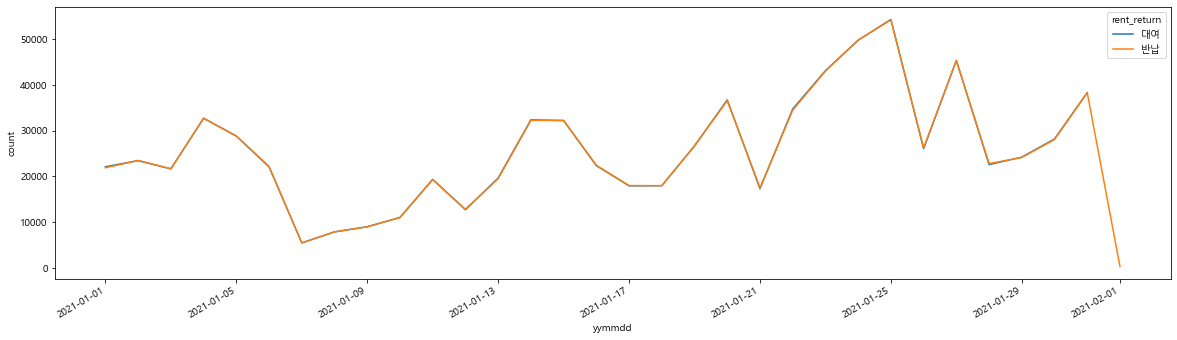

In [100]:
# 특정 기간동안의 따릉이 대여/반납 수
plt.figure(figsize=(20, 5))
plt.xticks(rotation=30, ha='right')
sns.lineplot(data=rental_2021_ymd, x='yymmdd', y='count', hue='rent_return')

In [101]:
rental_2021_ymd = rental_2021_ymd.sort_values(by="ymd")
rental_2021_ymd.head()

,ymd,count,rent_return,yymmdd
18,2021-01-01,22119,대여,2021-01-01
19,2021-01-01,21905,반납,2021-01-01
15,2021-01-02,23492,반납,2021-01-02
15,2021-01-02,23463,대여,2021-01-02
20,2021-01-03,21692,반납,2021-01-03


## 5.4 요일별 대여/반납 현황

In [107]:
rental_2021_dow_1 = rental_2021['rental_dow'].value_counts().reset_index()
rental_2021_dow_1.columns = ['dayofweek', 'count']
rental_2021_dow_1 = rental_2021_dow_1.sort_values('dayofweek')
rental_2021_dow_1['rent_return'] = '대여'
print(rental_2021_dow_1.shape)

rental_2021_dow_2 = rental_2021['return_dow'].value_counts().reset_index()
rental_2021_dow_2.columns = ['dayofweek', 'count']
rental_2021_dow_2 = rental_2021_dow_2.sort_values('dayofweek')
rental_2021_dow_2['rent_return'] = '반납'
print(rental_2021_dow_2.shape)

rental_2021_dow = pd.concat([rental_2021_dow_1, rental_2021_dow_2]).reindex()
print(rental_2021_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [109]:
rental_2021_dow.head(3)

,dayofweek,count,rent_return
2,0,124405,대여
5,1,94330,대여
3,2,123854,대여


In [110]:
rental_2021_dow.tail(3)

,dayofweek,count,rent_return
4,4,120676,반납
1,5,126044,반납
0,6,138863,반납


In [111]:
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
rental_2021_dow['weekday'] = rental_2021_dow['dayofweek'].apply(lambda x : weekday_map[x])
rental_2021_dow[['dayofweek', 'weekday']].head()

,dayofweek,weekday
2,0,월
5,1,화
3,2,수
6,3,목
4,4,금


<AxesSubplot:title={'center':'요일별 자전거 대여수'}, xlabel='weekday', ylabel='count'>

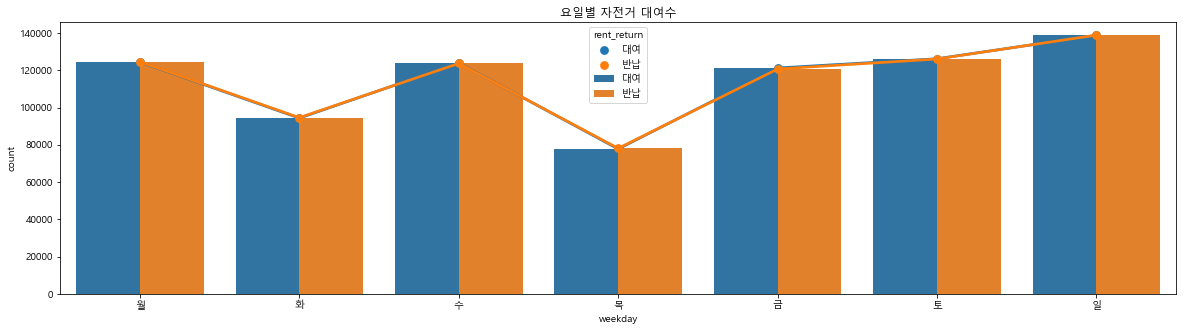

In [112]:
plt.figure(figsize=(20, 5))
plt.title("요일별 자전거 대여수")
sns.pointplot(data=rental_2021_dow, x="weekday", y="count", hue="rent_return")
sns.barplot(data=rental_2021_dow, x="weekday", y="count", hue="rent_return")

## 5.5 시간대별 대여/반납량

In [113]:
rental_2021_hour_1 = rental_2021['rental_hour'].value_counts().reset_index()
rental_2021_hour_1.columns = ['hour', 'count']
rental_2021_hour_1 = rental_2021_hour_1.sort_values('hour')
rental_2021_hour_1['rent_return'] = '대여'
rental_2021_hour_1.head()

rental_2021_hour_2 = rental_2021['return_hour'].value_counts().reset_index()
rental_2021_hour_2.columns = ['hour', 'count']
rental_2021_hour_2 = rental_2021_hour_2.sort_values('hour')
rental_2021_hour_2['rent_return'] = '반납'
rental_2021_hour_2.head()

rental_2021_hour = pd.concat([rental_2021_hour_1, rental_2021_hour_2])
rental_2021_hour.head()

,hour,count,rent_return
17,0,12528,대여
19,1,9993,대여
20,2,6900,대여
22,3,4991,대여
23,4,4338,대여


<AxesSubplot:xlabel='hour', ylabel='count'>

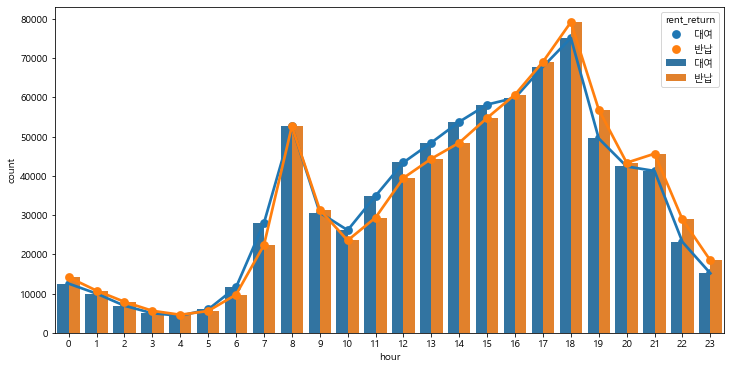

In [114]:
plt.figure(figsize=(12,6))
sns.pointplot(data=rental_2021_hour, x="hour", y="count", hue="rent_return")
sns.barplot(data=rental_2021_hour, x="hour", y="count", hue="rent_return")

- 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
- 출근시간대에는 대여가 반납보다 많다.
- 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
- 오전 10시부터 15시까지는 대여가 반납보다 많다.(대여>반납)
- 18시 이후부터 오전 2시까지는 대여보다 반납이 많다.(대여<반납)

In [116]:
rental_2021_minute_1 = rental_2021['rental_minute'].value_counts().reset_index()
rental_2021_minute_1.columns = ['minute', 'count']
rental_2021_minute_1 = rental_2021_minute_1.sort_values('minute')
rental_2021_minute_1['rent_return'] = '대여'
print(rental_2021_minute_1.shape)

rental_2021_minute_2 = rental_2021['return_minute'].value_counts().reset_index()
rental_2021_minute_2.columns = ['minute', 'count']
rental_2021_minute_2 = rental_2021_minute_2.sort_values('minute')
rental_2021_minute_2['rent_return'] = '반납'
print(rental_2021_minute_2.shape)

rental_2021_minute = pd.concat([rental_2021_minute_1, rental_2021_minute_2])
print(rental_2021_minute.shape)

(60, 3)
(60, 3)
(120, 3)


<AxesSubplot:title={'center':'시간대별(분) 자전거 대여/반납수'}, xlabel='minute', ylabel='count'>

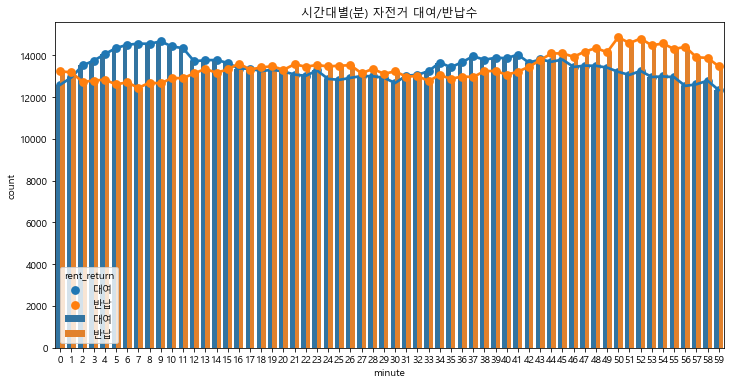

In [117]:
plt.figure(figsize=(12,6))
plt.title('시간대별(분) 자전거 대여/반납수')
sns.pointplot(data=rental_2021_minute, x="minute", y="count", hue="rent_return")
sns.barplot(data=rental_2021_minute, x="minute", y="count", hue="rent_return")

- 2~ 15분, 33 ~ 41분 사이에 대여가 더 많이 일어나며, 반납은 44~60분 사이에 더 많이 일어남

# 6. 대여와 반납이 같은 곳에 이루어지고 있나?

In [118]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
rental_2021['rent_return_same_loc'] = rental_2021['rental_loc_name'] == rental_2021['return_loc_name']

In [119]:
rental_2021_location_diff = rental_2021['rent_return_same_loc'].value_counts().reset_index()
rental_2021_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = rental_2021_location_diff['대여반납수'][0]/rental_2021_location_diff['대여반납수'][1]
print(f'같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {location_diff_ratio:.2f}배 많다.')
rental_2021_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 8.51배 많다.


,일치여부,대여반납수
0,False,721660
1,True,84843


<AxesSubplot:title={'center':'대여반납소 일치여부'}>

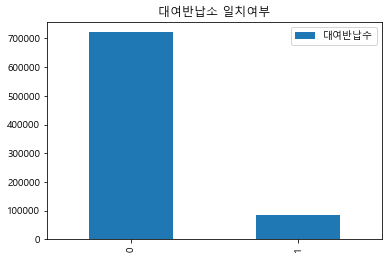

In [120]:
rental_2021_location_diff.plot.bar(title="대여반납소 일치여부")

- 같은 곳에서 대여반납을 하는 것보다 다른 대여소에 대여반납 하는 경우가 훨씬 많음

In [121]:
rental_2021_same_loc = rental_2021.loc[rental_2021['rent_return_same_loc'] == True]
rental_2021_same_loc.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,return_year,return_month,return_day,return_hour,return_minute,return_dayofweek,return_AM/PM,rental_dow,return_dow,rent_return_same_loc
21,SPB-53909,2021-01-05 10:12:29,10,위트콤,0,2021-01-05 10:56:57,10,위트콤,0,44,...,2021,1,5,10,56,1,AM,1,1,True
22,SPB-53909,2021-01-05 10:58:33,10,위트콤,0,2021-01-05 11:01:13,10,위트콤,0,2,...,2021,1,5,11,1,1,AM,1,1,True
23,SPB-36252,2021-01-05 11:10:36,10,위트콤,0,2021-01-05 11:13:16,10,위트콤,0,2,...,2021,1,5,11,13,1,AM,1,1,True
24,SPB-47049,2021-01-05 13:46:33,10,위트콤,0,2021-01-05 13:50:10,10,위트콤,0,3,...,2021,1,5,13,50,1,PM,1,1,True
25,SPB-47049,2021-01-05 14:17:01,10,위트콤,0,2021-01-05 14:52:18,10,위트콤,0,35,...,2021,1,5,14,52,1,PM,1,1,True


In [122]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
rental_2021_same_loc['rental_loc_name'].value_counts().head(30)

여의나루역 1번출구 앞               664
뚝섬유원지역 1번출구 앞              600
월드컵공원                      493
옥수역 3번출구                   492
마포구민체육센터 앞                 490
봉림교 교통섬                    439
독산보도육교 앞 자전거 보관소           423
서울숲 관리사무소                  371
응봉역 1번출구                   327
청계천 생태교실 앞                 316
CJ 드림시티                    301
신대방역 2번 출구                 274
신정교 하부                     273
한신16차아파트 119동 앞            265
동방1교                       256
올림픽공원역 3번출구                254
고속터미널역 8-1번, 8-2번 출구 사이    217
마포어린이공원                    214
여의도중학교 옆                   209
한성백제역 2번 출구                206
당산육갑문                      206
홍은사거리                      198
잠실나루역 (2번 출구 쪽)            196
근로자회관 사거리                  193
양평우림 이비즈센타 앞               187
KBS 앞                      186
선유도역 3번출구 앞                184
영등포구청역 1번출구                184
흑석역 1번출구                   182
종로플레이스                     181
Name: rental_loc_name, dtype: int64

- 같은 곳에서 대여반납이 이루어지는 곳은 공원, 한강 주변인 것을 확인할 수 있음

# 7. 같은/다른 대여소에서 대여가 되는 자전거의 평균 이용시간

## 7.1 같은 대여반납소

In [123]:
same_loc_mean_time = rental_2021_same_loc['rental_time'].mean()

print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)

rental_2021_same_mean = rental_2021_same_loc.groupby(['rental_loc_name', 'rental_loc_no', 'return_loc_name'])['rental_time'].mean().reset_index()

rental_2021_same_count = rental_2021_same_loc.groupby(['rental_loc_name', 'rental_loc_no', 'return_loc_name']).size().reset_index()

rental_2021_same_count.columns = ['rental_loc_name', 'rental_loc_no', 'return_loc_name', '이용횟수']

rental_2021_same_loc2 = rental_2021_same_mean.merge(rental_2021_same_count, 
                                                    left_on=['rental_loc_name', 'rental_loc_no', 'return_loc_name'], 
                                                    right_on=['rental_loc_name', 'rental_loc_no', 'return_loc_name'])

rental_2021_same_loc2.sort_values(by='rental_time', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  48.53878339992692


,rental_loc_name,rental_loc_no,return_loc_name,rental_time,이용횟수
949,산호시티빌 옆,1864,산호시티빌 옆,150.000000,1
894,복정역 1번 출구 앞,2605,복정역 1번 출구 앞,149.000000,1
161,강서아동복지센터,3781,강서아동복지센터,139.000000,3
593,동원베네스트 건너편,4617,동원베네스트 건너편,114.500000,2
1568,옥수동성당 옆,523,옥수동성당 옆,111.000000,1
1493,역삼빌딩 앞(하나은행 옆),2349,역삼빌딩 앞(하나은행 옆),106.950000,20
1376,신이문역 2번출구,607,신이문역 2번출구,102.357143,42
1923,청담역 2번출구,2354,청담역 2번출구,94.000000,6
1983,프런트원(공덕역4번출구 앞),4202,프런트원(공덕역4번출구 앞),93.400000,5
598,동일로58길 입구,3863,동일로58길 입구,93.333333,3


In [124]:
# 이용횟수가 많은 곳의 평균 이용시간
rental_2021_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,rental_loc_name,rental_loc_no,return_loc_name,rental_time,이용횟수
1482,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,63.210843,664
630,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,59.303333,600
1644,월드컵공원,186,월드컵공원,58.391481,493
1569,옥수역 3번출구,565,옥수역 3번출구,61.331301,492
716,마포구민체육센터 앞,152,마포구민체육센터 앞,55.281633,490
898,봉림교 교통섬,2102,봉림교 교통섬,49.523918,439
557,독산보도육교 앞 자전거 보관소,1827,독산보도육교 앞 자전거 보관소,60.555556,423
1096,서울숲 관리사무소,3515,서울숲 관리사무소,52.690027,371
1693,응봉역 1번출구,3511,응봉역 1번출구,60.042813,327
1913,청계천 생태교실 앞,583,청계천 생태교실 앞,51.028481,316


<AxesSubplot:ylabel='Frequency'>

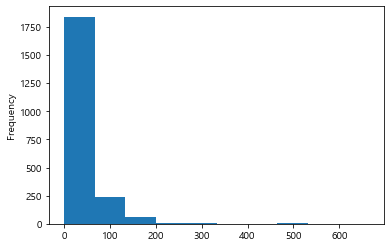

In [125]:
rental_2021_same_loc2['이용횟수'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

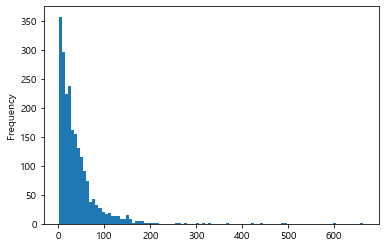

In [126]:
rental_2021_same_loc2['이용횟수'].plot.hist(bins=100)

<AxesSubplot:xlabel='이용횟수', ylabel='Density'>

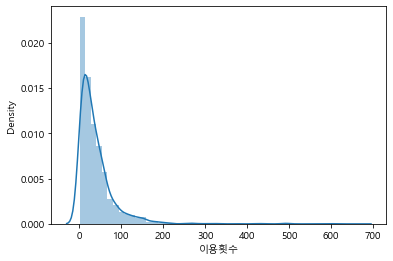

In [127]:
sns.distplot(rental_2021_same_loc2['이용횟수'])

## 7.2 다른 대여/반납소

In [128]:
rental_2021_diff_loc = rental_2021.loc[rental_2021['rent_return_same_loc'] == False]
rental_2021_diff_loc.shape

(721660, 30)

In [129]:
diff_loc_mean_time = rental_2021_diff_loc['rental_time'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', rental_2021_diff_loc['rental_time'].mean())

rental_2021_diff_mean = rental_2021_diff_loc.groupby(
    ['rental_loc_name', 'return_loc_name'])['rental_time'].mean().reset_index()
rental_2021_diff_count = rental_2021_diff_loc.groupby(
    ['rental_loc_name', 'return_loc_name']).size().reset_index()

rental_2021_diff_count.columns = ['rental_loc_name', 'return_loc_name', '이용횟수']
rental_2021_diff_loc2 = rental_2021_diff_mean.merge(rental_2021_diff_count, 
                                  left_on=['rental_loc_name', 'return_loc_name'], 
                                  right_on=['rental_loc_name', 'return_loc_name'])
rental_2021_diff_loc2.sort_values(by='rental_time', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  23.007683673752183


,rental_loc_name,return_loc_name,rental_time,이용횟수
74448,삼청공원 앞,이화공영주차장,857.0,1
74399,삼전역 1번출구,양재동 꽃시장 건너편,731.0,1
9379,강남 을지병원 교차로,신논현역 4번출구,718.0,1
22520,구로구청,서울대입구역 5번출구,705.0,1
85067,서울특별시 동부교육지원청(육교),성동구 견인차량 보관소 앞,619.0,1
96048,숙명여대 입구 교차로,북아현 치안센터 인근,514.5,2
77851,샛강역 1번출구 앞,YP 센터 앞,473.0,1
71755,산업은행 앞,양평1 보행육교 앞,467.0,1
138497,종로4가 사거리,한성대7번출구 앞,463.0,1
133578,잠실역 6번출구,"고속터미널역 8-1번, 8-2번 출구 사이",427.0,1


In [130]:
rental_2021_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,rental_loc_name,return_loc_name,rental_time,이용횟수
132345,자양중앙나들목,뚝섬유원지역 1번출구 앞,12.691617,334
90974,성수역3번출구,이마트 버스정류소 옆,9.055901,322
134898,장안동위더스빌옆,장한평역 1번출구 (국민은행앞),4.436667,300
68269,봉림교 교통섬,동방1교,17.963087,298
90437,성수2가1동 공영주차장 인근,성수역3번출구,6.449477,287
47318,뚝섬유원지역 1번출구 앞,자양중앙나들목,17.574913,287
43089,동방1교,봉림교 교통섬,18.928839,267
132042,자양나들목,뚝섬유원지역 1번출구 앞,11.051724,232
90829,성수역 2번출구 앞,성동세무서 건너편,7.763393,224
129765,이마트 버스정류소 옆,성수역3번출구,7.632287,223


In [131]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print(f'같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f} 분 많다.')

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 25.53 분 많다.


- 자양중앙나들목 <--> 뚝섬유원지역1번출구 앞이 가장 이용횟수가 높은 대여반납소임
- 이용횟수가 많은 대여소라고 평균이용시간이 평균보다 높지는 않음

# 8. 해당 기간동안 가장 많이 이용된 자전거는 몇회 대여 되었을까?

In [132]:
bike_describe = rental_2021['bike_no'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 18945
가장 많이 대여된 자전거 번호 : SPB-53496
가장 많이 대여된 자전거의 대여횟수 : 166


count        806503
unique        18945
top       SPB-53496
freq            166
Name: bike_no, dtype: object

In [133]:
bike_rent_counts = rental_2021['bike_no'].value_counts().reset_index()
bike_rent_counts.columns = ['bike_no', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 42.570757455793085
자전거 하나당 가장 많이 대여된 횟수: 166
자전거 하나당 가장 적게 대여된 횟수: 1


<AxesSubplot:ylabel='Frequency'>

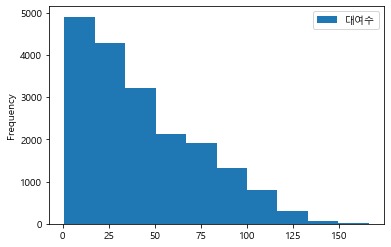

In [134]:
bike_rent_counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

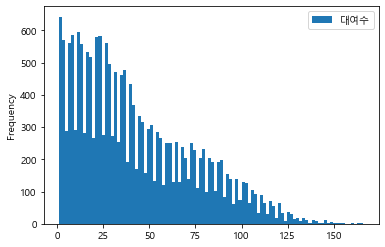

In [135]:
# bin의 갯수를 늘려서 그려본다.
bike_rent_counts.plot.hist(bins=100)

<AxesSubplot:xlabel='대여수', ylabel='Density'>

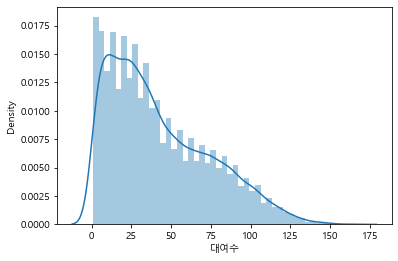

In [136]:
# 자전거 하나당 특정 기간동안 대여된 횟수
sns.distplot(bike_rent_counts["대여수"])

In [139]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = rental_2021.loc[rental_2021['bike_no'] == bike_describe[2]]
most_bike_df.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,return_year,return_month,return_day,return_hour,return_minute,return_dayofweek,return_AM/PM,rental_dow,return_dow,rent_return_same_loc
79008,SPB-53496,2021-01-24 20:52:47,258,신길역3번출구,0,2021-01-24 21:27:02,2102,봉림교 교통섬,0,34,...,2021,1,24,21,27,6,PM,6,6,False
89390,SPB-53496,2021-01-24 19:27:49,276,SK 영등포주유소,0,2021-01-24 19:52:38,258,신길역3번출구,0,24,...,2021,1,24,19,52,6,PM,6,6,False
139608,SPB-53496,2021-01-31 11:24:36,415,DMC역 9번출구 앞,0,2021-01-31 11:41:27,415,DMC역 9번출구 앞,0,16,...,2021,1,31,11,41,6,AM,6,6,True
139610,SPB-53496,2021-01-31 13:05:05,415,DMC역 9번출구 앞,0,2021-01-31 13:47:57,440,하늘공원 입구,0,42,...,2021,1,31,13,47,6,PM,6,6,False
149495,SPB-53496,2021-01-31 13:48:24,440,하늘공원 입구,0,2021-01-31 15:10:02,912,응암오거리,0,81,...,2021,1,31,15,10,6,PM,6,6,False


In [140]:
most_bike_df['rental_loc_name'].value_counts()

마곡나루역 2번 출구    10
노량진동 맥도널드앞      5
발산역 6번 출구 뒤     5
마곡13단지          5
마곡역교차로          5
               ..
7호선 이수역7번출구     1
김포공항입구 교차로      1
강서공업고등학교 앞      1
롯데중앙연구소         1
은천교회            1
Name: rental_loc_name, Length: 101, dtype: int64

In [141]:
rent_station = most_bike_df['rental_loc_name'].unique()
rent_station

array(['신길역3번출구', 'SK 영등포주유소', 'DMC역 9번출구 앞', '하늘공원 입구', '목동주차장',
       '목동트라팰리스 웨스턴에비뉴', '목월공원 앞', 'CJ 드림시티', '은평평화공원(역촌역4번출구)', '응암오거리',
       '새절역 2번출구', '서울혁신파크', '응암시장교차로', '녹번 힐스테이트상가앞', '응암역 1번출구',
       '방화역 4번출구앞', '방화근린공원', '신방화사거리', '공항시장역 2번출구 뒤', '공항시장역 4번출구',
       '공항중학교앞', '마곡엠밸리6_7단지 마곡중학교', '마곡엠밸리4단지 정문', '서남환경공원 버스정류장',
       '스타벅스앞', '증미역 3번출구뒤(등촌두산위브센티움오피스텔)', '발산역 6번 출구 뒤',
       '우장산역 1번출구옆(우장산아이파크105동앞)', '송정역 1번출구', '마곡역교차로',
       '발산역 1번, 9번 인근 대여소', '기쁜우리복지관', '가양역 8번출구', '양천향교역 7번출구앞',
       '공항초등학교건너편', '방화동강서기동대앞', '마곡중학교 후문', '강서구립등빛도서관',
       '마곡수명산파크3단지 교차로', '마곡엠밸리10단지 앞', '수명중?고교', '마곡엠밸리 15단지(1502동) 건너편',
       'KBS 스포츠월드', '마곡13단지', '롯데중앙연구소', '마곡역 교차로(2번출구)', '마곡역 교차로(NH농협)',
       '마곡수명산파크 209동 건너편', '마곡센트럴타워 1차', '엠펠리체 호텔 건너편', 'LG 사이언스파크',
       '가리봉동주민센터', '태평양물산빌딩', '녹십초요양병원앞', '장승배기역 5번출구', '장승배기역2번출구뒷편쪽',
       '삼익아파트', '노량진동 맥도널드앞', '양문교회 앞', '숭실대 입구역3번 출구 앞', '7호선 이수역7번출구',
       '기아자동차 사당점 앞', '봉림교 교통섬', '은천로입구 가로공원', '신림역

In [142]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move

['신길역3번출구',
 'SK 영등포주유소',
 'DMC역 9번출구 앞',
 '하늘공원 입구',
 '목동주차장',
 '목동트라팰리스 웨스턴에비뉴',
 '목월공원 앞',
 'CJ 드림시티',
 '은평평화공원(역촌역4번출구)',
 '응암오거리',
 '새절역 2번출구',
 '서울혁신파크',
 '응암시장교차로',
 '녹번 힐스테이트상가앞',
 '응암역 1번출구',
 '방화역 4번출구앞',
 '방화근린공원',
 '신방화사거리',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '공항중학교앞',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡엠밸리4단지 정문',
 '서남환경공원 버스정류장',
 '스타벅스앞',
 '증미역 3번출구뒤(등촌두산위브센티움오피스텔)',
 '발산역 6번 출구 뒤',
 '우장산역 1번출구옆(우장산아이파크105동앞)',
 '송정역 1번출구',
 '마곡역교차로',
 '발산역 1번, 9번 인근 대여소',
 '기쁜우리복지관',
 '가양역 8번출구',
 '양천향교역 7번출구앞',
 '공항초등학교건너편',
 '방화동강서기동대앞',
 '마곡중학교 후문',
 '강서구립등빛도서관',
 '마곡수명산파크3단지 교차로',
 '마곡엠밸리10단지 앞',
 '수명중?고교',
 '마곡엠밸리 15단지(1502동) 건너편',
 'KBS 스포츠월드',
 '마곡13단지',
 '롯데중앙연구소',
 '마곡역 교차로(2번출구)',
 '마곡역 교차로(NH농협)',
 '마곡수명산파크 209동 건너편',
 '마곡센트럴타워 1차',
 '엠펠리체 호텔 건너편',
 'LG 사이언스파크',
 '가리봉동주민센터',
 '태평양물산빌딩',
 '녹십초요양병원앞',
 '장승배기역 5번출구',
 '장승배기역2번출구뒷편쪽',
 '삼익아파트',
 '노량진동 맥도널드앞',
 '양문교회 앞',
 '숭실대 입구역3번 출구 앞',
 '7호선 이수역7번출구',
 '기아자동차 사당점 앞',
 '봉림교 교통섬',
 '은천로입구 가로공원',
 '신림역 5번출구',
 '서울신성초등학교',
 '신림1교 교차로',
 '당곡사거

# 9. 대여소별로 전체 대여/반납 , 오전오후 대여/반납 구하기

## 9.1 대여는 있는데 반납은 없는 대여소 or 반납은 있는데 대여는 없는곳 있는지 확인

In [143]:
A = rental_2021['rental_loc_name'].value_counts()
A.index

Index(['여의나루역 1번출구 앞', '뚝섬유원지역 1번출구 앞', '봉림교 교통섬', '롯데월드타워(잠실역2번출구 쪽)',
       '마곡나루역 2번 출구', '마포구민체육센터 앞', '구로디지털단지역 앞', '신대방역 2번 출구', '영등포구청역 1번출구',
       '마곡나루역 5번출구 뒤편',
       ...
       '강남센터', '상담센터', '장로회신학대학교 주기철 기념관', '암사동 선사유적지', '상암센터 정비실',
       '왕십리 자이아파트', '서초종합체육관 입구', '대한무역투자진흥공사 KOTRA 앞', '에이텍', '골마을 근린공원'],
      dtype='object', length=2186)

In [144]:
B = rental_2021['return_loc_name'].value_counts()

In [145]:
only_rent=[]
for i in A.index:
    if i not in B.index:
        only_rent.append(i)
print(only_rent)

['상담센터', '상암센터 정비실', '에이텍']


In [146]:
only_return=[]
for i in B.index:
    if i not in A.index:
        only_return.append(i)
print(only_return)
        

[]


## 9.2 대여소별로 대여/반납 추출

In [147]:
rental_2021['rental_loc_name'].value_counts()

여의나루역 1번출구 앞          2592
뚝섬유원지역 1번출구 앞         2554
봉림교 교통섬               2345
롯데월드타워(잠실역2번출구 쪽)     2076
마곡나루역 2번 출구           2016
                      ... 
왕십리 자이아파트                7
서초종합체육관 입구               5
대한무역투자진흥공사 KOTRA 앞       2
에이텍                      1
골마을 근린공원                 1
Name: rental_loc_name, Length: 2186, dtype: int64

In [148]:
rental_2021['return_loc_name'].value_counts()

뚝섬유원지역 1번출구 앞         3091
여의나루역 1번출구 앞          2676
봉림교 교통섬               2405
마포구민체육센터 앞            2260
롯데월드타워(잠실역2번출구 쪽)     2084
                      ... 
왕십리 자이아파트                5
쌍용아파트2단지 상가앞             5
능안마을입구                   4
대한무역투자진흥공사 KOTRA 앞       2
쌍용아파트2단지 정문              1
Name: return_loc_name, Length: 2183, dtype: int64

In [149]:
rent_count = rental_2021.groupby('rental_loc_name')['rental_loc_name'].count()
rent_count

rental_loc_name
(구)신한은행 중랑교지점     559
(구)합정동 주민센터       369
(시립)고덕평생학습관       131
(재)FITI시험연구원      476
3호선 매봉역 3번출구앞     475
                 ... 
흑석한강푸르지오(110동)    103
흥국사 정류장            41
희성오피앙             409
희훈타워빌 앞           295
힐스테이트에코           738
Name: rental_loc_name, Length: 2186, dtype: int64

In [150]:
len(rent_count)

2186

In [151]:
return_count = rental_2021.groupby('return_loc_name')['return_loc_name'].count()
return_count

return_loc_name
(구)신한은행 중랑교지점     634
(구)합정동 주민센터       369
(시립)고덕평생학습관       129
(재)FITI시험연구원      462
3호선 매봉역 3번출구앞     490
                 ... 
흑석한강푸르지오(110동)     30
흥국사 정류장            54
희성오피앙             424
희훈타워빌 앞           297
힐스테이트에코           729
Name: return_loc_name, Length: 2183, dtype: int64

In [152]:
len(return_count)

2183

In [153]:
both_exist = []
for i in rent_count.index:
    if i in return_count.index:
        both_exist.append(i)
len(both_exist) 
# 겹치는 대여소 총 2183개

2183

In [154]:
# 대여 대여소에만 속하는 3개는 제거
for i in rent_count.index:
    if i in ['상담센터', '상암센터 정비실', '에이텍']:
        rent_count.drop(i, inplace=True)

In [155]:
print(len(rent_count))
print(len(return_count))

2183
2183


## 9.3 대여소별로 오전/오후 대여/반납 횟수 추출

In [160]:
rent_ampm_count = rental_2021.groupby('rental_loc_name')['rental_AM/PM'].value_counts(dropna=False)

In [161]:
rent_ampm_count

rental_loc_name  rental_AM/PM
(구)신한은행 중랑교지점    PM              368
                 AM              191
(구)합정동 주민센터      PM              237
                 AM              132
(시립)고덕평생학습관      PM               94
                                ... 
희성오피앙            AM              118
희훈타워빌 앞          PM              189
                 AM              106
힐스테이트에코          PM              554
                 AM              184
Name: rental_AM/PM, Length: 4368, dtype: int64

In [162]:
len(rent_ampm_count)

4368

In [163]:
return_ampm_count = rental_2021.groupby('return_loc_name')['return_AM/PM'].value_counts()

In [164]:
return_ampm_count

return_loc_name  return_AM/PM
(구)신한은행 중랑교지점    PM              454
                 AM              180
(구)합정동 주민센터      PM              312
                 AM               57
(시립)고덕평생학습관      PM              100
                                ... 
희성오피앙            AM               92
희훈타워빌 앞          PM              244
                 AM               53
힐스테이트에코          PM              491
                 AM              238
Name: return_AM/PM, Length: 4359, dtype: int64

In [165]:
len(return_ampm_count.values)

4359

In [166]:
rent_ampm_count = rent_ampm_count.unstack()
rent_ampm_count

rental_AM/PM,AM,PM
rental_loc_name,,
(구)신한은행 중랑교지점,191.0,368.0
(구)합정동 주민센터,132.0,237.0
(시립)고덕평생학습관,37.0,94.0
(재)FITI시험연구원,146.0,330.0
3호선 매봉역 3번출구앞,120.0,355.0
...,...,...
흑석한강푸르지오(110동),56.0,47.0
흥국사 정류장,13.0,28.0
희성오피앙,118.0,291.0


In [167]:
# 대여 대여소에만 속하는 3개는 제거
for i in rent_ampm_count.index:
    if i in ['상담센터', '상암센터 정비실', '에이텍']:
        rent_ampm_count.drop(i, inplace=True)

In [168]:
rent_ampm_count.fillna(0, inplace=True)

In [169]:
return_ampm_count = return_ampm_count.unstack()
return_ampm_count

return_AM/PM,AM,PM
return_loc_name,,
(구)신한은행 중랑교지점,180.0,454.0
(구)합정동 주민센터,57.0,312.0
(시립)고덕평생학습관,29.0,100.0
(재)FITI시험연구원,139.0,323.0
3호선 매봉역 3번출구앞,111.0,379.0
...,...,...
흑석한강푸르지오(110동),1.0,29.0
흥국사 정류장,10.0,44.0
희성오피앙,92.0,332.0


In [171]:
return_ampm_count.fillna(0, inplace=True)

## 9.4 대여소별 대여/반납 , 오전대여/오후대여, 오전반납/오후반납 데이터프레임 생성

In [172]:
# 대여소별로 대여횟수 반납횟수 데이터프레임 생성
#rent_return = pd.DataFrame({'대여소명': both_exist, '대여횟수': rent_count.values, '반납횟수':return_count.values, '오전대여': rent_ampm_count.values[0:-2:2], '오후대여': rent_ampm_count.values[1:-1:2], '오전반납': return_ampm_count.values[0:-2:2], '오후반납': return_ampm_count.values[1:-1:2]})
rent_return = pd.DataFrame({'대여소명': both_exist, '대여횟수': rent_count.values, '반납횟수':return_count.values, 
                            '오전대여': [int(rent_ampm_count.values[i][0]) for i in range(len(rent_ampm_count))], 
                            '오후대여': [int(rent_ampm_count.values[i][1]) for i in range(len(rent_ampm_count))], 
                            '오전반납': [int(return_ampm_count.values[i][0]) for i in range(len(return_ampm_count))], 
                            '오후반납': [int(return_ampm_count.values[i][1]) for i in range(len(return_ampm_count))]})

In [173]:
rent_return

,대여소명,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
0,(구)신한은행 중랑교지점,559,634,191,368,180,454
1,(구)합정동 주민센터,369,369,132,237,57,312
2,(시립)고덕평생학습관,131,129,37,94,29,100
3,(재)FITI시험연구원,476,462,146,330,139,323
4,3호선 매봉역 3번출구앞,475,490,120,355,111,379
...,...,...,...,...,...,...,...
2178,흑석한강푸르지오(110동),103,30,56,47,1,29
2179,흥국사 정류장,41,54,13,28,10,44
2180,희성오피앙,409,424,118,291,92,332
2181,희훈타워빌 앞,295,297,106,189,53,244


In [174]:
rent_return_2 = rent_return.set_index('대여소명')
rent_return_2

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
(구)신한은행 중랑교지점,559,634,191,368,180,454
(구)합정동 주민센터,369,369,132,237,57,312
(시립)고덕평생학습관,131,129,37,94,29,100
(재)FITI시험연구원,476,462,146,330,139,323
3호선 매봉역 3번출구앞,475,490,120,355,111,379
...,...,...,...,...,...,...
흑석한강푸르지오(110동),103,30,56,47,1,29
흥국사 정류장,41,54,13,28,10,44
희성오피앙,409,424,118,291,92,332


In [175]:
top20_rent = rent_return_2.sort_values(by=['대여횟수'], ascending=False).head(20)
top20_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
여의나루역 1번출구 앞,2592,2676,564,2028,408,2268
뚝섬유원지역 1번출구 앞,2554,3091,431,2123,634,2457
봉림교 교통섬,2345,2405,557,1788,450,1955
롯데월드타워(잠실역2번출구 쪽),2076,2084,393,1683,681,1403
마곡나루역 2번 출구,2016,1989,518,1498,562,1427
마포구민체육센터 앞,1905,2260,348,1557,349,1911
구로디지털단지역 앞,1885,1925,499,1386,760,1165
신대방역 2번 출구,1867,1914,446,1421,587,1327
영등포구청역 1번출구,1772,1763,620,1152,537,1226


In [176]:
top20_return = rent_return_2.sort_values(by=['반납횟수'], ascending=False).head(20)
top20_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,2554,3091,431,2123,634,2457
여의나루역 1번출구 앞,2592,2676,564,2028,408,2268
봉림교 교통섬,2345,2405,557,1788,450,1955
마포구민체육센터 앞,1905,2260,348,1557,349,1911
롯데월드타워(잠실역2번출구 쪽),2076,2084,393,1683,681,1403
마곡나루역 2번 출구,2016,1989,518,1498,562,1427
구로디지털단지역 앞,1885,1925,499,1386,760,1165
신대방역 2번 출구,1867,1914,446,1421,587,1327
옥수역 3번출구,1632,1854,268,1364,322,1532


In [177]:
top20_am_rent = rent_return_2.sort_values(by=['오전대여'], ascending=False).head(20)
top20_am_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
마곡나루역 5번출구 뒤편,1756,1676,678,1078,731,945
영등포구청역 1번출구,1772,1763,620,1152,537,1226
여의나루역 1번출구 앞,2592,2676,564,2028,408,2268
봉림교 교통섬,2345,2405,557,1788,450,1955
성수역 2번출구 앞,1151,986,522,629,356,630
마곡나루역 2번 출구,2016,1989,518,1498,562,1427
동방1교,1708,1690,518,1190,445,1245
구로디지털단지역 앞,1885,1925,499,1386,760,1165
마곡역교차로,1672,1696,465,1207,634,1062


In [178]:
top20_pm_rent = rent_return_2.sort_values(by=['오후대여'], ascending=False).head(20)
top20_pm_rent

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,2554,3091,431,2123,634,2457
여의나루역 1번출구 앞,2592,2676,564,2028,408,2268
봉림교 교통섬,2345,2405,557,1788,450,1955
롯데월드타워(잠실역2번출구 쪽),2076,2084,393,1683,681,1403
마포구민체육센터 앞,1905,2260,348,1557,349,1911
마곡나루역 2번 출구,2016,1989,518,1498,562,1427
신대방역 2번 출구,1867,1914,446,1421,587,1327
청계천 생태교실 앞,1628,1771,223,1405,240,1531
구로디지털단지역 앞,1885,1925,499,1386,760,1165


In [179]:
top20_am_return = rent_return_2.sort_values(by=['오전반납'], ascending=False).head(20)
top20_am_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
장한평역 1번출구 (국민은행앞),1510,1596,412,1098,820,776
이마트 버스정류소 옆,1415,1517,253,1162,765,752
구로디지털단지역 앞,1885,1925,499,1386,760,1165
성동세무서 건너편,694,971,115,579,734,237
마곡나루역 5번출구 뒤편,1756,1676,678,1078,731,945
롯데월드타워(잠실역2번출구 쪽),2076,2084,393,1683,681,1403
뚝섬유원지역 1번출구 앞,2554,3091,431,2123,634,2457
마곡역교차로,1672,1696,465,1207,634,1062
오목교역 7번출구 앞,1451,1669,299,1152,615,1054


In [180]:
top20_pm_return = rent_return_2.sort_values(by=['오후반납'], ascending=False).head(20)
top20_pm_return

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
뚝섬유원지역 1번출구 앞,2554,3091,431,2123,634,2457
여의나루역 1번출구 앞,2592,2676,564,2028,408,2268
봉림교 교통섬,2345,2405,557,1788,450,1955
마포구민체육센터 앞,1905,2260,348,1557,349,1911
옥수역 3번출구,1632,1854,268,1364,322,1532
청계천 생태교실 앞,1628,1771,223,1405,240,1531
마곡나루역 2번 출구,2016,1989,518,1498,562,1427
롯데월드타워(잠실역2번출구 쪽),2076,2084,393,1683,681,1403
신대방역 2번 출구,1867,1914,446,1421,587,1327


<AxesSubplot:xlabel='오후대여', ylabel='Density'>

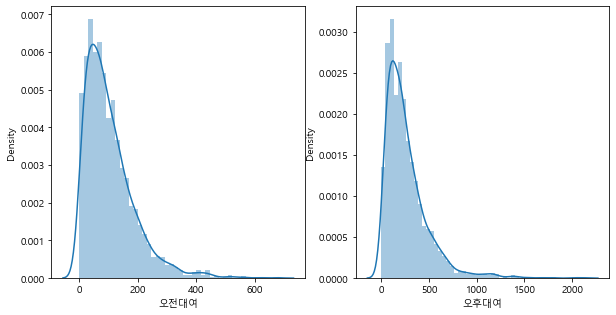

In [181]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(rent_return_2['오전대여'], ax=ax[0])
sns.distplot(rent_return_2['오후대여'], ax=ax[1])

<AxesSubplot:xlabel='오후대여'>

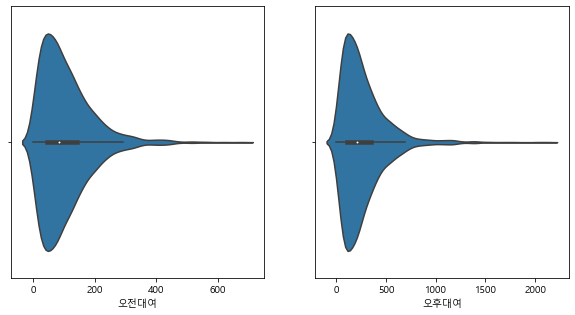

In [182]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.violinplot(rent_return_2['오전대여'], ax=ax[0])
sns.violinplot(rent_return_2['오후대여'], ax=ax[1])

In [183]:
rent_return_2.loc['흥국사 정류장']

대여횟수    41
반납횟수    54
오전대여    13
오후대여    28
오전반납    10
오후반납    44
Name: 흥국사 정류장, dtype: int64

In [184]:
# 이런식으로 대여/반납 차이 많이 나는곳 찾으면 될지?
rent_return_2.대여횟수[rent_return_2.대여횟수 > rent_return_2.반납횟수 *4]

대여소명
길음뉴타운푸르지오아파트 3단지     109
남태령역 2번출구             35
논골사거리(금호도서관 입구)      113
능안마을입구                19
돈암삼성풍림아파트             31
방배래미안아트힐 101동앞        92
백련산 힐스테이트 3차         163
봉천고개 육교              164
삼각산아이원아파트(105동 옆)     76
상도SH빌아파트 입구           72
서울신우초등학교              55
숭실대학교(중문)             82
신당 래미안 버스정류장         140
쌍용아파트2단지 상가앞          28
쌍용아파트2단지 정문           17
연가초등학교 옆             186
영락고등학교               196
하얏트호텔 앞               49
Name: 대여횟수, dtype: int64

In [185]:
# 이런식으로 대여/반납 차이 많이 나는곳 찾으면 될지?
rent_return_2.대여횟수[rent_return_2.대여횟수 *3 < rent_return_2.반납횟수]

대여소명
골마을 근린공원     1
중랑센터        14
Name: 대여횟수, dtype: int64

# 10. 그래프 시각화

## 10.1 rental_2021

In [186]:
rental_2021.head()

,bike_no,rental_date,rental_loc_no,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,...,return_year,return_month,return_day,return_hour,return_minute,return_dayofweek,return_AM/PM,rental_dow,return_dow,rent_return_same_loc
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,...,2021,1,2,21,15,5,PM,5,5,False
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,...,2021,1,4,16,17,0,PM,0,0,False
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,...,2021,1,13,21,14,2,PM,2,2,False
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,...,2021,1,14,21,13,3,PM,3,3,False
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,...,2021,1,18,18,15,0,PM,0,0,False


In [187]:
rental_2021[['rental_loc_no', 'rental_loc_name']].value_counts(ascending=True)

rental_loc_no  rental_loc_name   
9980           에이텍                      1
2918           골마을 근린공원                 1
2539           대한무역투자진흥공사 KOTRA 앞       2
2536           서초종합체육관 입구               5
5              상암센터 정비실                 7
                                     ... 
2715           마곡나루역 2번 출구           2016
1210           롯데월드타워(잠실역2번출구 쪽)     2076
2102           봉림교 교통섬               2345
502            뚝섬유원지역 1번출구 앞         2554
207            여의나루역 1번출구 앞          2592
Length: 2188, dtype: int64

## rent_return_2

In [188]:
rent_return_2.head()

,대여횟수,반납횟수,오전대여,오후대여,오전반납,오후반납
대여소명,,,,,,
(구)신한은행 중랑교지점,559,634,191,368,180,454
(구)합정동 주민센터,369,369,132,237,57,312
(시립)고덕평생학습관,131,129,37,94,29,100
(재)FITI시험연구원,476,462,146,330,139,323
3호선 매봉역 3번출구앞,475,490,120,355,111,379


No handles with labels found to put in legend.
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gram_\anaconda3\envs\min

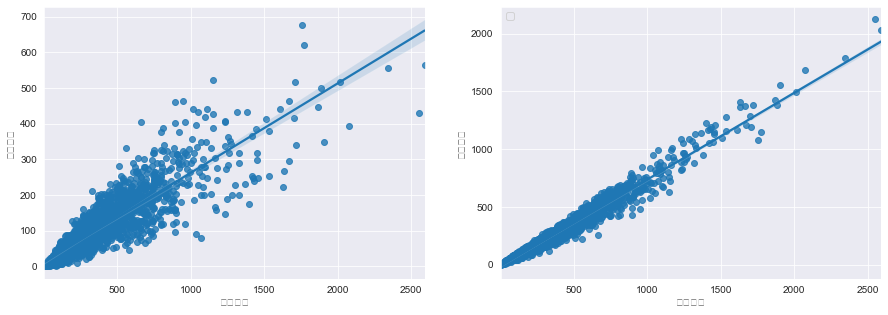

In [189]:
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.rc('font', family='NanumGothic')

sns.regplot(x='대여횟수',
           y='오전대여',
           data=rent_return_2,
           ax=ax1)

sns.regplot(x='대여횟수',
           y='오후대여',
           data=rent_return_2,
           ax=ax2)
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='오전대여', ylabel='Density'>

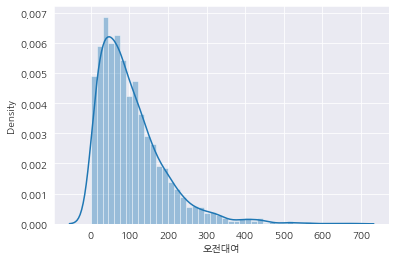

In [190]:
sns.distplot(rent_return_2['오전대여'])

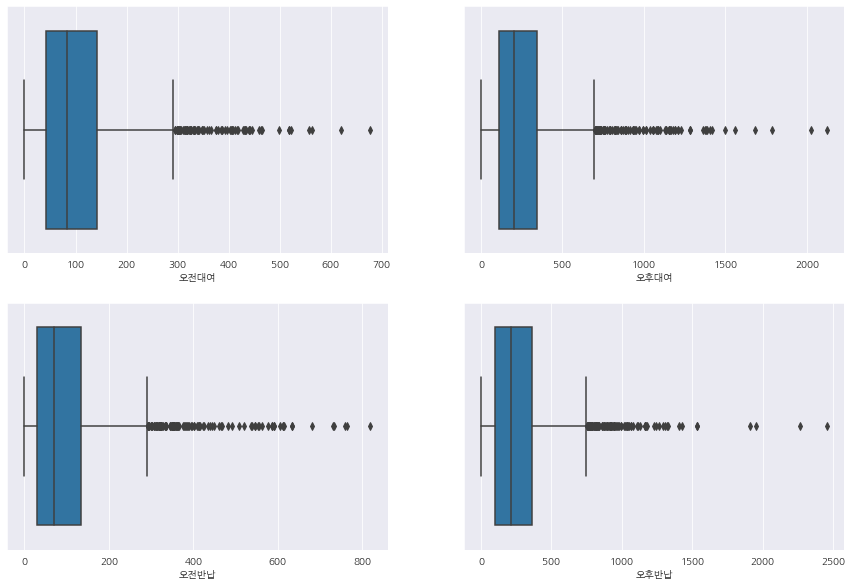

In [191]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(rent_return_2['오전대여'], ax=ax1)
sns.boxplot(rent_return_2['오후대여'], ax=ax2)
sns.boxplot(rent_return_2['오전반납'], ax=ax3)
sns.boxplot(rent_return_2['오후반납'], ax=ax4)

plt.show()

<AxesSubplot:ylabel='Frequency'>

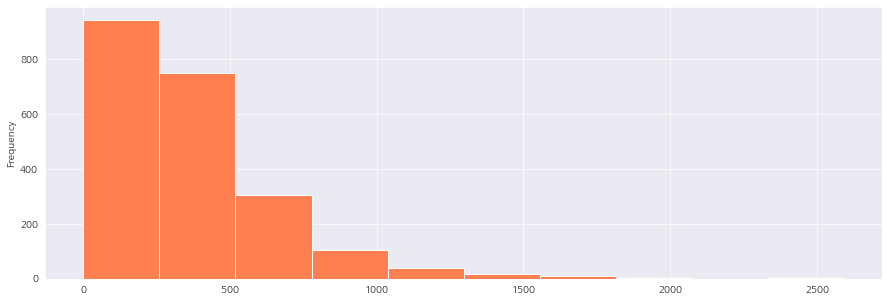

In [192]:
# 대여횟수
rent_return_2['대여횟수'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

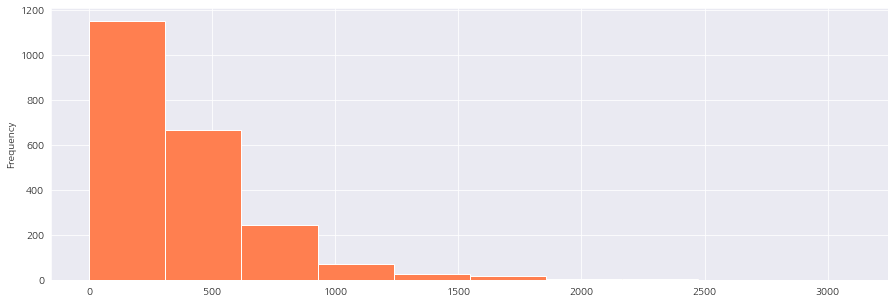

In [193]:
# 반납횟수
rent_return_2['반납횟수'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

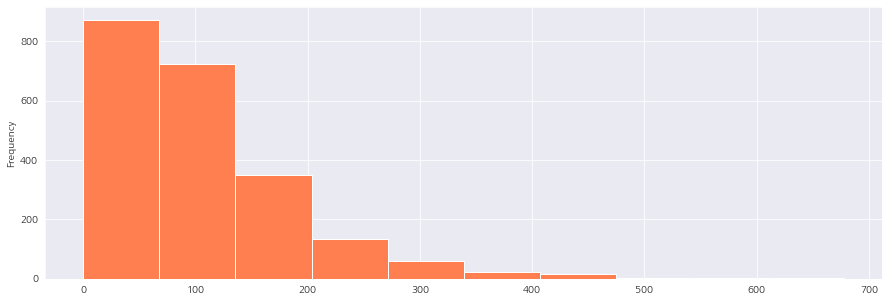

In [194]:
# 오전대여
rent_return_2['오전대여'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

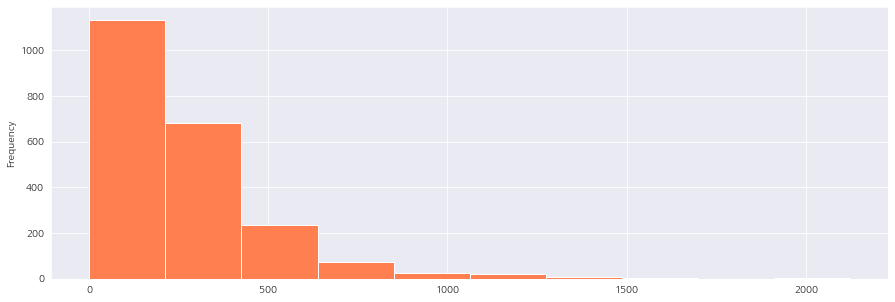

In [195]:
#  오후대여
rent_return_2['오후대여'].plot(kind='hist', bins=10, color='coral', figsize=(15,5))

In [196]:
rent_return_2.sort_values(by=['대여횟수'], ascending=False, inplace=True)
rent_return_2.sort_values(by=['반납횟수'], ascending=False, inplace=True)

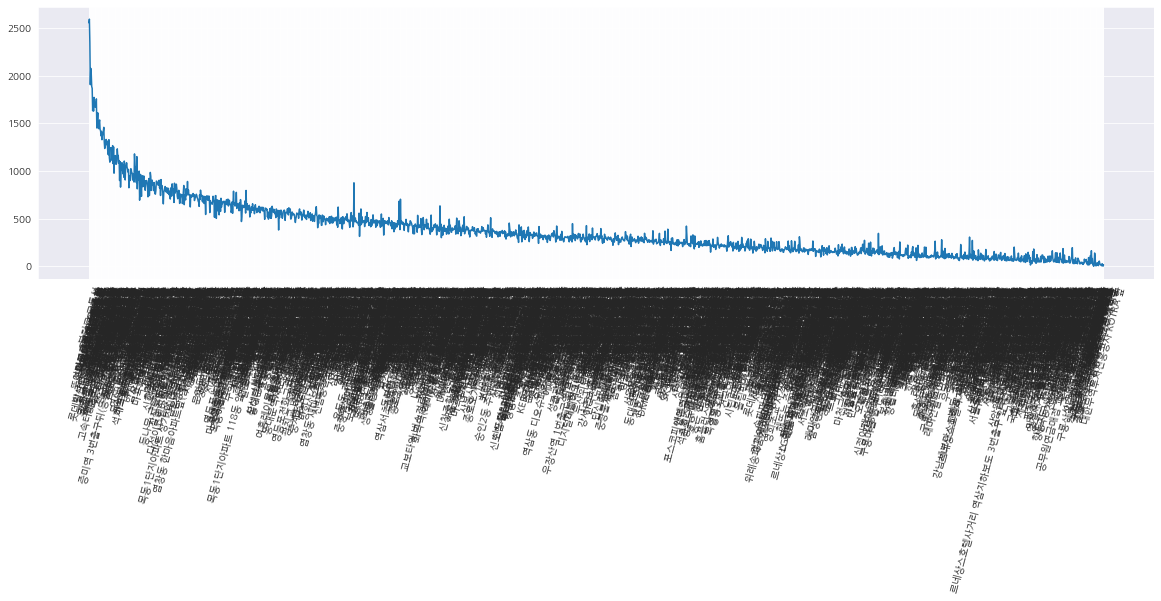

In [197]:
fig = plt.figure(figsize=(20,5))
plt.plot(rent_return_2.index, rent_return_2['대여횟수'])
plt.xticks(rotation=75)
plt.show()

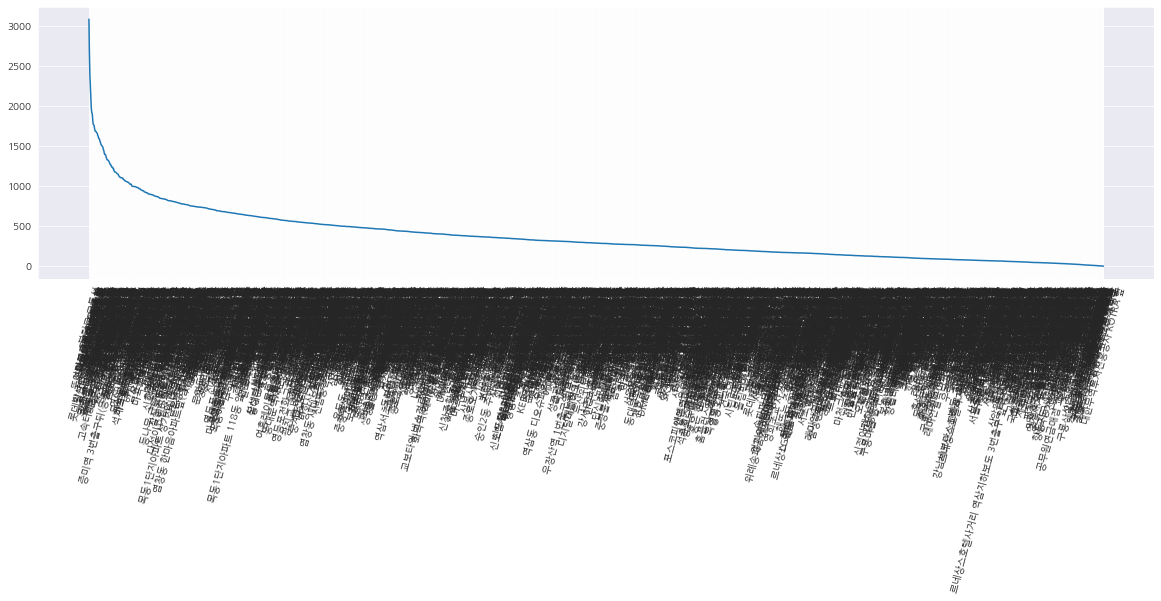

In [198]:
fig = plt.figure(figsize=(20,5))
plt.plot(rent_return_2.index, rent_return_2['반납횟수'])
plt.xticks(rotation=75)
plt.show()

In [199]:
rent_return_2.대여횟수

대여소명
뚝섬유원지역 1번출구 앞         2554
여의나루역 1번출구 앞          2592
봉림교 교통섬               2345
마포구민체육센터 앞            1905
롯데월드타워(잠실역2번출구 쪽)     2076
                      ... 
왕십리 자이아파트                7
쌍용아파트2단지 상가앞            28
능안마을입구                  19
대한무역투자진흥공사 KOTRA 앞       2
쌍용아파트2단지 정문             17
Name: 대여횟수, Length: 2183, dtype: int64